In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.models import load_model

C:\Users\JinSung\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JinSung\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JinSung\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\JinSung\Anaconda3\envs\tensorflow\lib\site-

In [3]:
#train data load
data = pd.read_csv('train.csv', sep=',')
data.head()
train_param = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

#test x data load
test_data = pd.read_csv('test.csv', sep=',')
test_data.head()
test_param = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

#test target data load
target_data = pd.read_csv('gender_submission.csv', sep=',')
target_data.head()
target_param = target_data[['Survived']]

In [4]:
# female = 0
# male = 1
train_param = train_param.replace('female', 0)
train_param = train_param.replace('male', 1)
test_param = test_param.replace('female', 0)
test_param = test_param.replace('male', 1)

In [5]:
#nan-data drop
temp_data_for_age = train_param.dropna(axis=0)
temp_data_age_np = temp_data_for_age.values
age_sample = np.mean(temp_data_age_np[:, 3:4])
print(age_sample)

train_param=train_param.fillna(age_sample)
#train_param = train_param.dropna(axis=0)
train_param_np = train_param.values
print(train_param)

temp_data = pd.concat([target_param, test_param], axis=1)
temp_data = temp_data.dropna(axis=0)
temp_np = temp_data.values

29.69911764705882
     Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0           0       3    1  22.000000      1      0   7.2500
1           1       1    0  38.000000      1      0  71.2833
2           1       3    0  26.000000      0      0   7.9250
3           1       1    0  35.000000      1      0  53.1000
4           0       3    1  35.000000      0      0   8.0500
..        ...     ...  ...        ...    ...    ...      ...
886         0       2    1  27.000000      0      0  13.0000
887         1       1    0  19.000000      0      0  30.0000
888         0       3    0  29.699118      1      2  23.4500
889         1       1    1  26.000000      0      0  30.0000
890         0       3    1  32.000000      0      0   7.7500

[891 rows x 7 columns]


In [6]:
x_train_np = train_param_np[:, 1:7].astype('float32')
y_train_np = train_param_np[:, 0:1].astype('float32')

x_test_np = temp_np[:, 1:7].astype('float32')
y_test_np = temp_np[:, 0:1].astype('float32')

In [7]:
#data down scale

nomal_param = x_train_np.max(axis=0).astype('float32')
print(nomal_param)
x_train_np[:, 0:1] = x_train_np[:, 0:1] / nomal_param[0]
x_train_np[:, 1:2] = x_train_np[:, 1:2] / nomal_param[1]
x_train_np[:, 2:3] = x_train_np[:, 2:3] / nomal_param[2]
x_train_np[:, 3:4] = x_train_np[:, 3:4] / nomal_param[3]
x_train_np[:, 4:5] = x_train_np[:, 4:5] / nomal_param[4]
x_train_np[:, 5:6] = x_train_np[:, 5:6] / nomal_param[5]

x_test_np[:, 0:1] = x_test_np[:, 0:1] / nomal_param[0]
x_test_np[:, 1:2] = x_test_np[:, 1:2] / nomal_param[1]
x_test_np[:, 2:3] = x_test_np[:, 2:3] / nomal_param[2]
x_test_np[:, 3:4] = x_test_np[:, 3:4] / nomal_param[3]
x_test_np[:, 4:5] = x_test_np[:, 4:5] / nomal_param[4]
x_test_np[:, 5:6] = x_test_np[:, 5:6] / nomal_param[5]

[  3.       1.      80.       8.       6.     512.3292]


In [8]:
model = Sequential()
model.add(Dense(255, input_dim=6, activation="relu"))
model.add(Dense(128, input_dim=6, activation="relu"))
model.add(Dense((1), activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.01), loss='mean_squared_error', metrics=["accuracy"])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 255)               1785      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32768     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 34,682
Trainable params: 34,682
Non-trainable params: 0
_________________________________________________________________


In [9]:
%%time
hist = model.fit(x_train_np, y_train_np,
                 epochs=1000, batch_size = 5,
                 verbose=1)

Epoch 1/1000
891/891 [==============================] - 2s 2ms/sample - loss: 0.2280 - acc: 0.6150
Epoch 2/1000
891/891 [==============================] - 1s 681us/sample - loss: 0.2076 - acc: 0.6162
Epoch 3/1000
891/891 [==============================] - 1s 595us/sample - loss: 0.1977 - acc: 0.6240
Epoch 4/1000
891/891 [==============================] - 1s 583us/sample - loss: 0.1897 - acc: 0.7374
Epoch 5/1000
891/891 [==============================] - 1s 590us/sample - loss: 0.1829 - acc: 0.7957
Epoch 6/1000
891/891 [==============================] - 1s 576us/sample - loss: 0.1774 - acc: 0.7912
Epoch 7/1000
891/891 [==============================] - 1s 591us/sample - loss: 0.1729 - acc: 0.7868
Epoch 8/1000
891/891 [==============================] - 1s 611us/sample - loss: 0.1691 - acc: 0.7868
Epoch 9/1000
891/891 [==============================] - 1s 618us/sample - loss: 0.1663 - acc: 0.7868
Epoch 10/1000
891/891 [==============================] - 1s 594us/sample - loss: 0.1640 - acc

891/891 [==============================] - 1s 593us/sample - loss: 0.1368 - acc: 0.8070
Epoch 81/1000
891/891 [==============================] - 1s 595us/sample - loss: 0.1369 - acc: 0.8081
Epoch 82/1000
891/891 [==============================] - 1s 573us/sample - loss: 0.1367 - acc: 0.8114
Epoch 83/1000
891/891 [==============================] - 0s 490us/sample - loss: 0.1369 - acc: 0.8058
Epoch 84/1000
891/891 [==============================] - 0s 351us/sample - loss: 0.1361 - acc: 0.8126
Epoch 85/1000
891/891 [==============================] - 0s 354us/sample - loss: 0.1368 - acc: 0.8070
Epoch 86/1000
891/891 [==============================] - 0s 424us/sample - loss: 0.1362 - acc: 0.8092
Epoch 87/1000
891/891 [==============================] - 1s 568us/sample - loss: 0.1364 - acc: 0.8081
Epoch 88/1000
891/891 [==============================] - 0s 555us/sample - loss: 0.1367 - acc: 0.8103
Epoch 89/1000
891/891 [==============================] - 0s 459us/sample - loss: 0.1365 - acc: 0

891/891 [==============================] - 0s 511us/sample - loss: 0.1325 - acc: 0.8249
Epoch 159/1000
891/891 [==============================] - 1s 561us/sample - loss: 0.1320 - acc: 0.8171
Epoch 160/1000
891/891 [==============================] - 1s 578us/sample - loss: 0.1325 - acc: 0.8204
Epoch 161/1000
891/891 [==============================] - 1s 572us/sample - loss: 0.1319 - acc: 0.8193
Epoch 162/1000
891/891 [==============================] - 1s 578us/sample - loss: 0.1323 - acc: 0.8193
Epoch 163/1000
891/891 [==============================] - 1s 579us/sample - loss: 0.1318 - acc: 0.8227
Epoch 164/1000
891/891 [==============================] - 1s 578us/sample - loss: 0.1320 - acc: 0.8227
Epoch 165/1000
891/891 [==============================] - 1s 574us/sample - loss: 0.1321 - acc: 0.8182
Epoch 166/1000
891/891 [==============================] - 1s 583us/sample - loss: 0.1320 - acc: 0.8137
Epoch 167/1000
891/891 [==============================] - 1s 576us/sample - loss: 0.1320

891/891 [==============================] - 1s 623us/sample - loss: 0.1297 - acc: 0.8249
Epoch 238/1000
891/891 [==============================] - 1s 612us/sample - loss: 0.1290 - acc: 0.8272
Epoch 239/1000
891/891 [==============================] - 1s 600us/sample - loss: 0.1297 - acc: 0.8249
Epoch 240/1000
891/891 [==============================] - 1s 587us/sample - loss: 0.1298 - acc: 0.8227
Epoch 241/1000
891/891 [==============================] - 1s 593us/sample - loss: 0.1297 - acc: 0.8215
Epoch 242/1000
891/891 [==============================] - 1s 576us/sample - loss: 0.1297 - acc: 0.8227
Epoch 243/1000
891/891 [==============================] - 1s 607us/sample - loss: 0.1294 - acc: 0.8193
Epoch 244/1000
891/891 [==============================] - 1s 609us/sample - loss: 0.1290 - acc: 0.8249
Epoch 245/1000
891/891 [==============================] - 0s 453us/sample - loss: 0.1296 - acc: 0.8215
Epoch 246/1000
891/891 [==============================] - 0s 360us/sample - loss: 0.1297

891/891 [==============================] - 1s 586us/sample - loss: 0.1276 - acc: 0.8339
Epoch 317/1000
891/891 [==============================] - 1s 588us/sample - loss: 0.1283 - acc: 0.8249
Epoch 318/1000
891/891 [==============================] - 0s 360us/sample - loss: 0.1277 - acc: 0.8350
Epoch 319/1000
891/891 [==============================] - 0s 511us/sample - loss: 0.1281 - acc: 0.8272
Epoch 320/1000
891/891 [==============================] - 0s 346us/sample - loss: 0.1279 - acc: 0.8215
Epoch 321/1000
891/891 [==============================] - 0s 510us/sample - loss: 0.1282 - acc: 0.8350
Epoch 322/1000
891/891 [==============================] - 1s 575us/sample - loss: 0.1279 - acc: 0.8305
Epoch 323/1000
891/891 [==============================] - 1s 587us/sample - loss: 0.1278 - acc: 0.8294
Epoch 324/1000
891/891 [==============================] - 1s 586us/sample - loss: 0.1278 - acc: 0.8316
Epoch 325/1000
891/891 [==============================] - 1s 589us/sample - loss: 0.1281

891/891 [==============================] - 1s 589us/sample - loss: 0.1270 - acc: 0.8350
Epoch 396/1000
891/891 [==============================] - 1s 614us/sample - loss: 0.1266 - acc: 0.8373
Epoch 397/1000
891/891 [==============================] - 1s 604us/sample - loss: 0.1270 - acc: 0.8373
Epoch 398/1000
891/891 [==============================] - 1s 596us/sample - loss: 0.1266 - acc: 0.8328
Epoch 399/1000
891/891 [==============================] - 1s 599us/sample - loss: 0.1261 - acc: 0.8316
Epoch 400/1000
891/891 [==============================] - 0s 409us/sample - loss: 0.1270 - acc: 0.8328
Epoch 401/1000
891/891 [==============================] - 0s 383us/sample - loss: 0.1267 - acc: 0.8350
Epoch 402/1000
891/891 [==============================] - 0s 381us/sample - loss: 0.1268 - acc: 0.8406
Epoch 403/1000
891/891 [==============================] - 0s 386us/sample - loss: 0.1263 - acc: 0.8339
Epoch 404/1000
891/891 [==============================] - 0s 394us/sample - loss: 0.1267

891/891 [==============================] - 0s 404us/sample - loss: 0.1256 - acc: 0.8328
Epoch 475/1000
891/891 [==============================] - 1s 575us/sample - loss: 0.1259 - acc: 0.8373
Epoch 476/1000
891/891 [==============================] - 1s 609us/sample - loss: 0.1258 - acc: 0.8361
Epoch 477/1000
891/891 [==============================] - 1s 623us/sample - loss: 0.1258 - acc: 0.8339
Epoch 478/1000
891/891 [==============================] - 1s 625us/sample - loss: 0.1259 - acc: 0.8361
Epoch 479/1000
891/891 [==============================] - 1s 603us/sample - loss: 0.1257 - acc: 0.8283
Epoch 480/1000
891/891 [==============================] - 1s 588us/sample - loss: 0.1258 - acc: 0.8328
Epoch 481/1000
891/891 [==============================] - 1s 582us/sample - loss: 0.1256 - acc: 0.8328
Epoch 482/1000
891/891 [==============================] - 1s 607us/sample - loss: 0.1261 - acc: 0.8339
Epoch 483/1000
891/891 [==============================] - 0s 382us/sample - loss: 0.1257

891/891 [==============================] - 1s 593us/sample - loss: 0.1247 - acc: 0.8260
Epoch 554/1000
891/891 [==============================] - 1s 615us/sample - loss: 0.1251 - acc: 0.8350
Epoch 555/1000
891/891 [==============================] - 1s 574us/sample - loss: 0.1250 - acc: 0.8328
Epoch 556/1000
891/891 [==============================] - 1s 575us/sample - loss: 0.1249 - acc: 0.8294
Epoch 557/1000
891/891 [==============================] - 1s 582us/sample - loss: 0.1250 - acc: 0.8339
Epoch 558/1000
891/891 [==============================] - 1s 595us/sample - loss: 0.1246 - acc: 0.8305
Epoch 559/1000
891/891 [==============================] - 1s 586us/sample - loss: 0.1242 - acc: 0.8339
Epoch 560/1000
891/891 [==============================] - 1s 617us/sample - loss: 0.1255 - acc: 0.8283
Epoch 561/1000
891/891 [==============================] - 1s 586us/sample - loss: 0.1247 - acc: 0.8350
Epoch 562/1000
891/891 [==============================] - 1s 569us/sample - loss: 0.1252

891/891 [==============================] - 0s 441us/sample - loss: 0.1241 - acc: 0.8373
Epoch 633/1000
891/891 [==============================] - 0s 386us/sample - loss: 0.1239 - acc: 0.8350
Epoch 634/1000
891/891 [==============================] - 0s 394us/sample - loss: 0.1245 - acc: 0.8316
Epoch 635/1000
891/891 [==============================] - 0s 556us/sample - loss: 0.1237 - acc: 0.8339
Epoch 636/1000
891/891 [==============================] - 1s 581us/sample - loss: 0.1245 - acc: 0.8316
Epoch 637/1000
891/891 [==============================] - 1s 573us/sample - loss: 0.1232 - acc: 0.8350
Epoch 638/1000
891/891 [==============================] - 1s 587us/sample - loss: 0.1247 - acc: 0.8361
Epoch 639/1000
891/891 [==============================] - 1s 579us/sample - loss: 0.1243 - acc: 0.8305
Epoch 640/1000
891/891 [==============================] - 1s 574us/sample - loss: 0.1243 - acc: 0.8373
Epoch 641/1000
891/891 [==============================] - 1s 595us/sample - loss: 0.1238

891/891 [==============================] - 0s 474us/sample - loss: 0.1238 - acc: 0.8384
Epoch 712/1000
891/891 [==============================] - 0s 385us/sample - loss: 0.1237 - acc: 0.8316
Epoch 713/1000
891/891 [==============================] - 0s 351us/sample - loss: 0.1232 - acc: 0.8328
Epoch 714/1000
891/891 [==============================] - 1s 578us/sample - loss: 0.1241 - acc: 0.8361
Epoch 715/1000
891/891 [==============================] - 1s 581us/sample - loss: 0.1234 - acc: 0.8316
Epoch 716/1000
891/891 [==============================] - 0s 444us/sample - loss: 0.1239 - acc: 0.8373
Epoch 717/1000
891/891 [==============================] - 1s 575us/sample - loss: 0.1238 - acc: 0.8328
Epoch 718/1000
891/891 [==============================] - 1s 583us/sample - loss: 0.1236 - acc: 0.8316
Epoch 719/1000
891/891 [==============================] - 1s 580us/sample - loss: 0.1234 - acc: 0.8339
Epoch 720/1000
891/891 [==============================] - 1s 590us/sample - loss: 0.1237

891/891 [==============================] - 1s 636us/sample - loss: 0.1233 - acc: 0.8328
Epoch 791/1000
891/891 [==============================] - 1s 598us/sample - loss: 0.1229 - acc: 0.8384
Epoch 792/1000
891/891 [==============================] - 1s 597us/sample - loss: 0.1234 - acc: 0.8350
Epoch 793/1000
891/891 [==============================] - 1s 621us/sample - loss: 0.1231 - acc: 0.8361
Epoch 794/1000
891/891 [==============================] - 1s 612us/sample - loss: 0.1233 - acc: 0.8361
Epoch 795/1000
891/891 [==============================] - 1s 564us/sample - loss: 0.1229 - acc: 0.8350
Epoch 796/1000
891/891 [==============================] - 0s 500us/sample - loss: 0.1233 - acc: 0.8316
Epoch 797/1000
891/891 [==============================] - 0s 543us/sample - loss: 0.1232 - acc: 0.8361
Epoch 798/1000
891/891 [==============================] - 0s 510us/sample - loss: 0.1229 - acc: 0.8361
Epoch 799/1000
891/891 [==============================] - 1s 581us/sample - loss: 0.1233

891/891 [==============================] - 1s 620us/sample - loss: 0.1229 - acc: 0.8339
Epoch 870/1000
891/891 [==============================] - 0s 533us/sample - loss: 0.1224 - acc: 0.8328
Epoch 871/1000
891/891 [==============================] - ETA: 0s - loss: 0.1221 - acc: 0.839 - 0s 391us/sample - loss: 0.1225 - acc: 0.8384
Epoch 872/1000
891/891 [==============================] - 0s 416us/sample - loss: 0.1218 - acc: 0.8418
Epoch 873/1000
891/891 [==============================] - 0s 500us/sample - loss: 0.1224 - acc: 0.8339
Epoch 874/1000
891/891 [==============================] - 0s 485us/sample - loss: 0.1227 - acc: 0.8361
Epoch 875/1000
891/891 [==============================] - 0s 546us/sample - loss: 0.1227 - acc: 0.8272
Epoch 876/1000
891/891 [==============================] - 1s 601us/sample - loss: 0.1225 - acc: 0.8350
Epoch 877/1000
891/891 [==============================] - 1s 624us/sample - loss: 0.1227 - acc: 0.8328
Epoch 878/1000
891/891 [==========================

Epoch 948/1000
891/891 [==============================] - 1s 589us/sample - loss: 0.1225 - acc: 0.8395
Epoch 949/1000
891/891 [==============================] - 1s 586us/sample - loss: 0.1224 - acc: 0.8373
Epoch 950/1000
891/891 [==============================] - 1s 598us/sample - loss: 0.1222 - acc: 0.8328
Epoch 951/1000
891/891 [==============================] - 0s 544us/sample - loss: 0.1221 - acc: 0.8328
Epoch 952/1000
891/891 [==============================] - 0s 440us/sample - loss: 0.1222 - acc: 0.8373
Epoch 953/1000
891/891 [==============================] - 1s 563us/sample - loss: 0.1222 - acc: 0.8361
Epoch 954/1000
891/891 [==============================] - 0s 462us/sample - loss: 0.1226 - acc: 0.8350
Epoch 955/1000
891/891 [==============================] - 1s 594us/sample - loss: 0.1215 - acc: 0.8440
Epoch 956/1000
891/891 [==============================] - 1s 599us/sample - loss: 0.1222 - acc: 0.8361
Epoch 957/1000
891/891 [==============================] - 1s 598us/sample

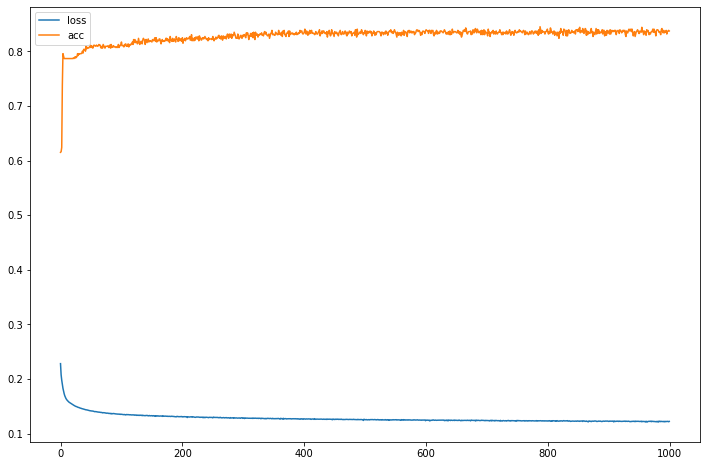

In [10]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['acc'])
plt.legend(['loss', 'acc'])
plt.show()

In [11]:
model.save('titanic_model.h5')

In [12]:
test_model = tf.keras.models.load_model('titanic_model.h5')
test_model.load_weights("titanic_model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 255)               1785      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32768     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 34,682
Trainable params: 34,682
Non-trainable params: 0
_________________________________________________________________


In [14]:
#test x data load
test_data = pd.read_csv('test.csv', sep=',')
test_data.head()
test_param = test_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

#test target data load
target_data = pd.read_csv('gender_submission.csv', sep=',')
target_data.head()
target_param = target_data[['Survived']]

test_param = test_param.replace('female', 0)
test_param = test_param.replace('male', 1)

temp_data = pd.concat([target_param, test_param], axis=1)
temp_data_for_age = temp_data.dropna(axis=0)

temp_data_for_age = temp_data_for_age.values
age_mean = np.mean(temp_data_for_age[:, 4:5])

temp_data=temp_data.fillna(29)
temp_np = temp_data.values
x_test_np = temp_np[:, 2:8].astype('float32')
y_test_np = temp_np[:, 0:1].astype('float32')
psger = temp_np[:, 1:2]

x_test_np[:, 0:1] = x_test_np[:, 0:1] / 3.0
x_test_np[:, 1:2] = x_test_np[:, 1:2] / 1.0
x_test_np[:, 2:3] = x_test_np[:, 2:3] / 80.0
x_test_np[:, 3:4] = x_test_np[:, 3:4] / 5.0
x_test_np[:, 4:5] = x_test_np[:, 4:5] / 6.0
x_test_np[:, 5:6] = x_test_np[:, 5:6] / 512.3292

In [15]:
from numpy import argmax
test_model.compile(loss="mean_squared_error", optimizer="SGD", metrics=['accuracy'])

# model evaluation
score = test_model.evaluate(x_test_np,y_test_np,verbose=0)

print("%s : %.2f%%" % (model.metrics_names[1], score[1]*100))
yhat = test_model.predict_classes(x_test_np)
yhat = yhat.reshape(418,1)
yhat = yhat.flatten()

acc : 91.15%


In [16]:
res = pd.DataFrame({
     'PassengerId': test_param['PassengerId'],
     'Survived': pd.Series(yhat) })

In [17]:
res.to_csv('res.csv', index=False)